In [1]:
## importing neccessry libraries  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
plt.rcParams['figure.figsize'] =(12,5)
plt.rcParams['figure.dpi'] = 200 
plt.style.use('ggplot')


In [2]:
## loading the data   
## importing the data 
data = pd.read_csv(r'd:\Tong123\DS\airline_passengers.csv',index_col='Month')

In [3]:
## checking the data  
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
## checking the index  
data.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [5]:
## changing the index to datetime  
data.index = pd.to_datetime(data.index).to_period('M')
## Checking the Index  
data.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

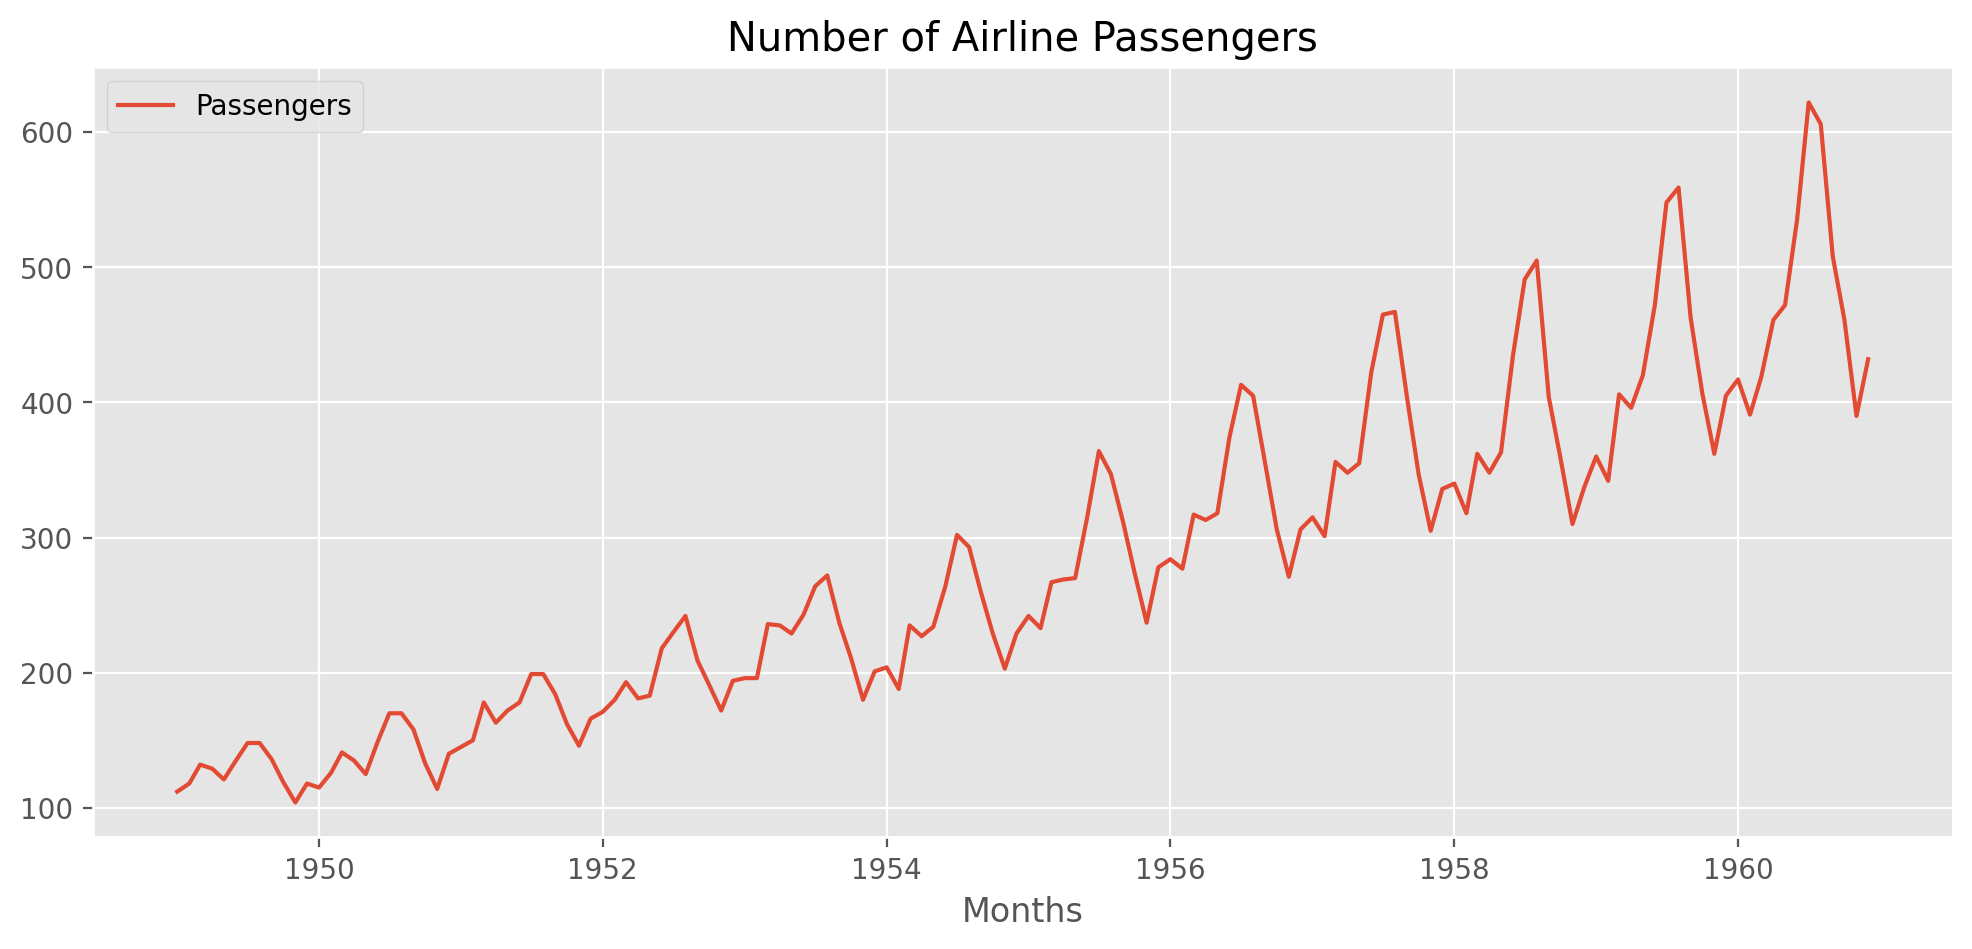

In [6]:
## plotting the data
plt.plot(data.index.to_timestamp(),data['Passengers'],label='Passengers')
plt.title('Airline Passengers Data')
plt.xlabel('Months')
plt.title('Number of Airline Passengers')
plt.legend()
plt.show()  


In [7]:
## specifying the test period and train period length  
test_period = 12 
## train period  
train_period = len(data)-test_period
## 
print(f'The length of test period is = {test_period}')
print(f'The length of Train Period is = {train_period}')

The length of test period is = 12
The length of Train Period is = 132


In [8]:
## creating the mask of train set and test test  
train = data[:train_period]
## test 
test = data[train_period:]
## print the data shapes  
print(f'The length of the Train period is = {train.shape}')
print(f'The length of the test period is = {test.shape}')

The length of the Train period is = (132, 1)
The length of the test period is = (12, 1)


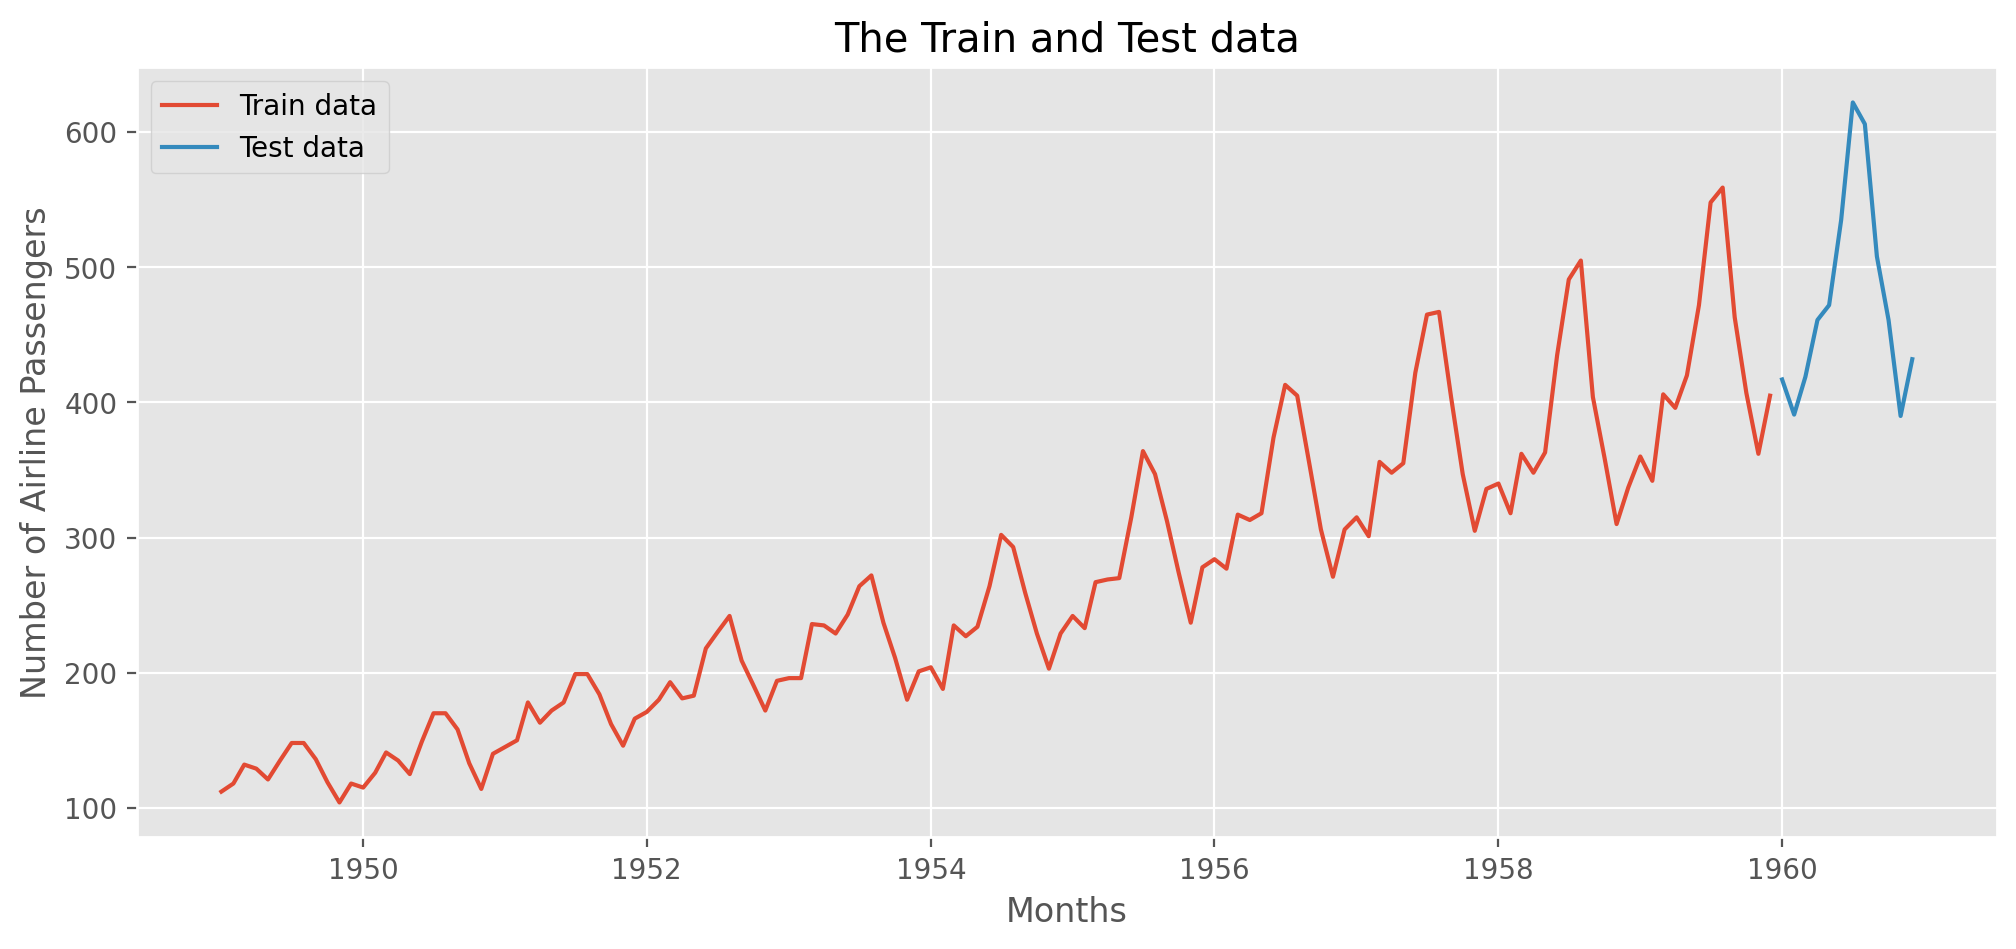

In [9]:
## Plotting the train data and the test data  
plt.plot(train.index.to_timestamp() , train['Passengers'] , label='Train data')
plt.plot(test.index.to_timestamp(),test['Passengers'],label='Test data')
plt.title('The Train and Test data')
plt.xlabel('Months')
plt.ylabel('Number of Airline Passengers')
plt.legend()
plt.show()

In [10]:
## creating Boolean Indicators  
train_indicator = (data.index <= train.index[-1])
## the test indicator   
test_indicator = (data.index > train.index[-1])
## print the shapes  
print(f'The length of train indicator {train_indicator.shape}')
print(f'The length of the test indicator {test_indicator.shape}')

The length of train indicator (144,)
The length of the test indicator (144,)


In [11]:
## showing the train indicator  
train_indicator

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
## the test indicator  
test_indicator

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
## defining the series  
series = data['Passengers'].dropna().to_numpy()
series

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [14]:
## creating Input features 
## defining the lags  
Tx = 2  
## The out put  
Ty = 1 
## creating the Input  
X = np.array([series[t:t+Tx] for t in range(len(series)-Tx-Ty+1)])
y = np.array([series[t+Tx:t+Tx+Ty] for t in range(len(series)-Tx-Ty+1)])

In [15]:
## print the shapesof  the data 
print(f'The shape of X is  = {X.shape}')
print(f'The shape of y is  =  {y.shape}')

The shape of X is  = (142, 2)
The shape of y is  =  (142, 1)


In [16]:
## splitting the data into train and test split  
X_trian , y_train = X[:-test_period] , y[:-test_period]
X_test , y_test = X[-test_period:] , y[-test_period:] 
## print the shaoes  
print(f'The shape for X train is = {X_trian.shape}')
print(f'The shape for y train is = {y_train.shape}')
print(f'The shape for X test is = {X_test.shape}')
print(f'The shape for y test is = {y_test.shape}')

The shape for X train is = (130, 2)
The shape for y train is = (130, 1)
The shape for X test is = (12, 2)
The shape for y test is = (12, 1)


In [17]:
## setting the last two values in the Train indicator to Fasle as they will be used for predicting  
train_indicator[:Tx] = False
## print the trian indicator  
train_indicator

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
## importing neccessary libraries  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
## intialize the model  
dt_model = DecisionTreeRegressor()
## fit the model        
dt_model.fit(X_trian , y_train)

DecisionTreeRegressor()

In [20]:
## make predictions  
dt_model_1_step_ahead_forecast_train = dt_model.predict(X_trian)
## test data  
dt_model_1_step_ahead_forecast_test= dt_model.predict(X_test)

In [21]:
## Select and Assign  ]
data.loc[train_indicator , 'dt_model_1_step_ahead_forecast_train'] = dt_model_1_step_ahead_forecast_train
## test 
data.loc[test_indicator ,'dt_model_1_step_ahead_forecast_test'] =dt_model_1_step_ahead_forecast_test


In [22]:
## checking the data  
data.head()

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test
Month,,,
1949-01,112,NaN,NaN
1949-02,118,NaN,NaN
1949-03,132,132.0,NaN
1949-04,129,129.0,NaN
1949-05,121,121.0,NaN


In [23]:
## checking the last five observations  
data.tail()

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test
Month,,,
1960-08,606,NaN,463.0
1960-09,508,NaN,463.0
1960-10,461,NaN,404.0
1960-11,390,NaN,404.0
1960-12,432,NaN,347.0


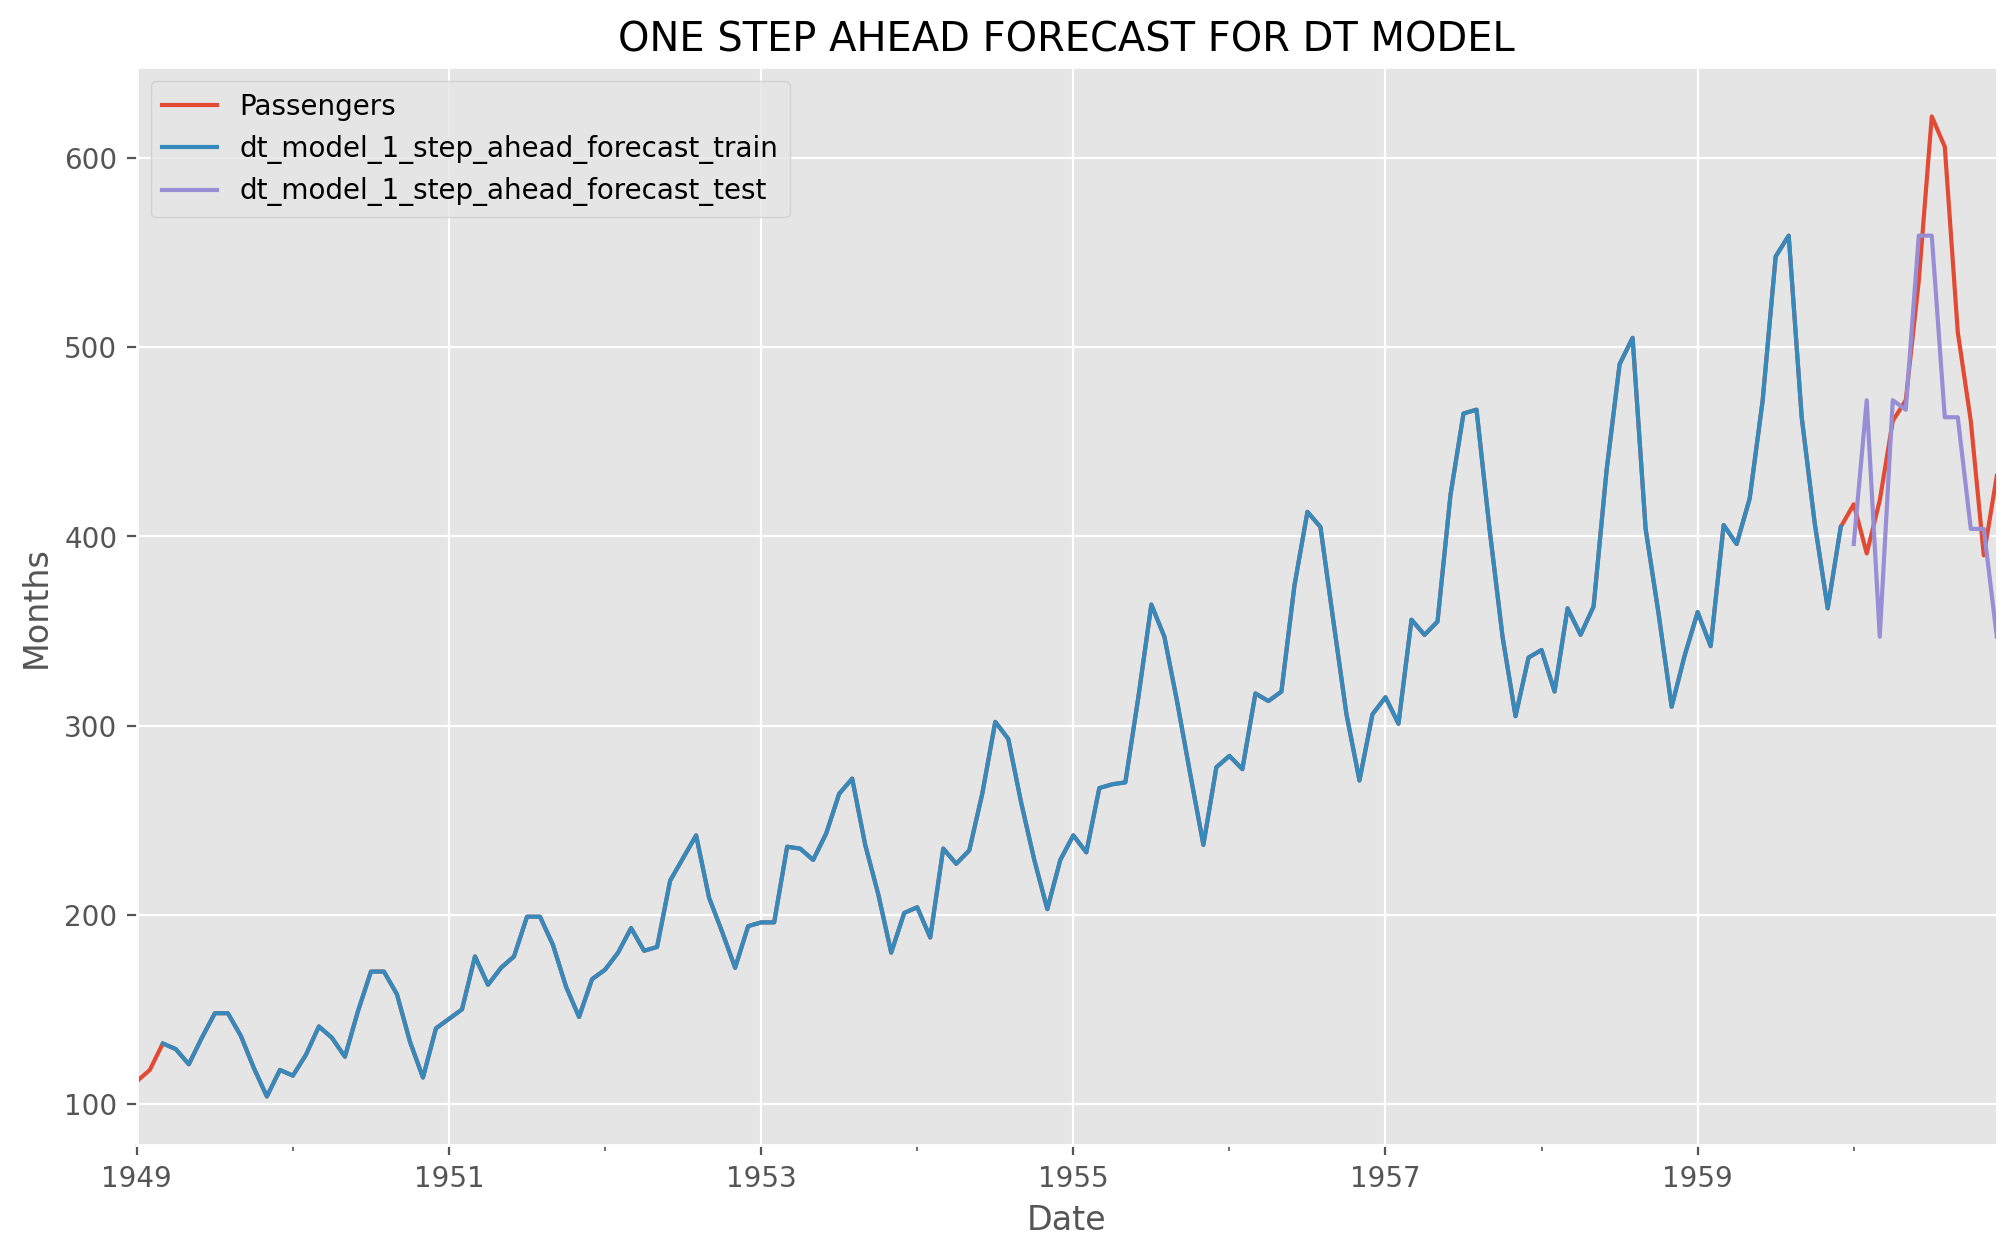

In [24]:
## plotting the data  
data[['Passengers','dt_model_1_step_ahead_forecast_train','dt_model_1_step_ahead_forecast_test']].plot(figsize=(12,7))
plt.title('ONE STEP AHEAD FORECAST FOR DT MODEL')
plt.xlabel('Date')
plt.ylabel('Months')
plt.legend()
plt.show()

In [25]:
input_x = X_test[0]
input_x

array([362, 405], dtype=int64)

In [26]:
prediction = dt_model.predict(input_x.reshape(1,-1))

In [27]:
prediction

array([396.])

In [28]:
## Mutiple Ahead forecats  
mutiple_step_forecasts = []
## selecting the first sample in the test data  
input_x = X_test[0]
## creating a while loop  
while len(mutiple_step_forecasts) < test_period:  
    prediction = dt_model.predict(input_x.reshape(1,-1))[0]
    ## save the predictions  
    mutiple_step_forecasts.append(prediction)
    ## update the prediction  
    input_x = np.roll(input_x , -1)
    input_x[-1] = prediction
    


In [29]:
## print the predictions  
mutiple_step_forecasts

[396.0,
 420.0,
 472.0,
 548.0,
 559.0,
 463.0,
 407.0,
 362.0,
 405.0,
 396.0,
 420.0,
 472.0]

In [30]:
## save the predictions  
data.loc[test_indicator ,'mutiple_step_forecasts'] = mutiple_step_forecasts
## showing the data  
data.head()

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test,mutiple_step_forecasts
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN
1949-03,132,132.0,NaN,NaN
1949-04,129,129.0,NaN,NaN
1949-05,121,121.0,NaN,NaN


In [31]:
## showing the tail  
data.tail(12)

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test,mutiple_step_forecasts
Month,,,,
1960-01,417,NaN,396.0,396.0
1960-02,391,NaN,472.0,420.0
1960-03,419,NaN,347.0,472.0
1960-04,461,NaN,472.0,548.0
1960-05,472,NaN,467.0,559.0
1960-06,535,NaN,559.0,463.0
1960-07,622,NaN,559.0,407.0
1960-08,606,NaN,463.0,362.0
1960-09,508,NaN,463.0,405.0


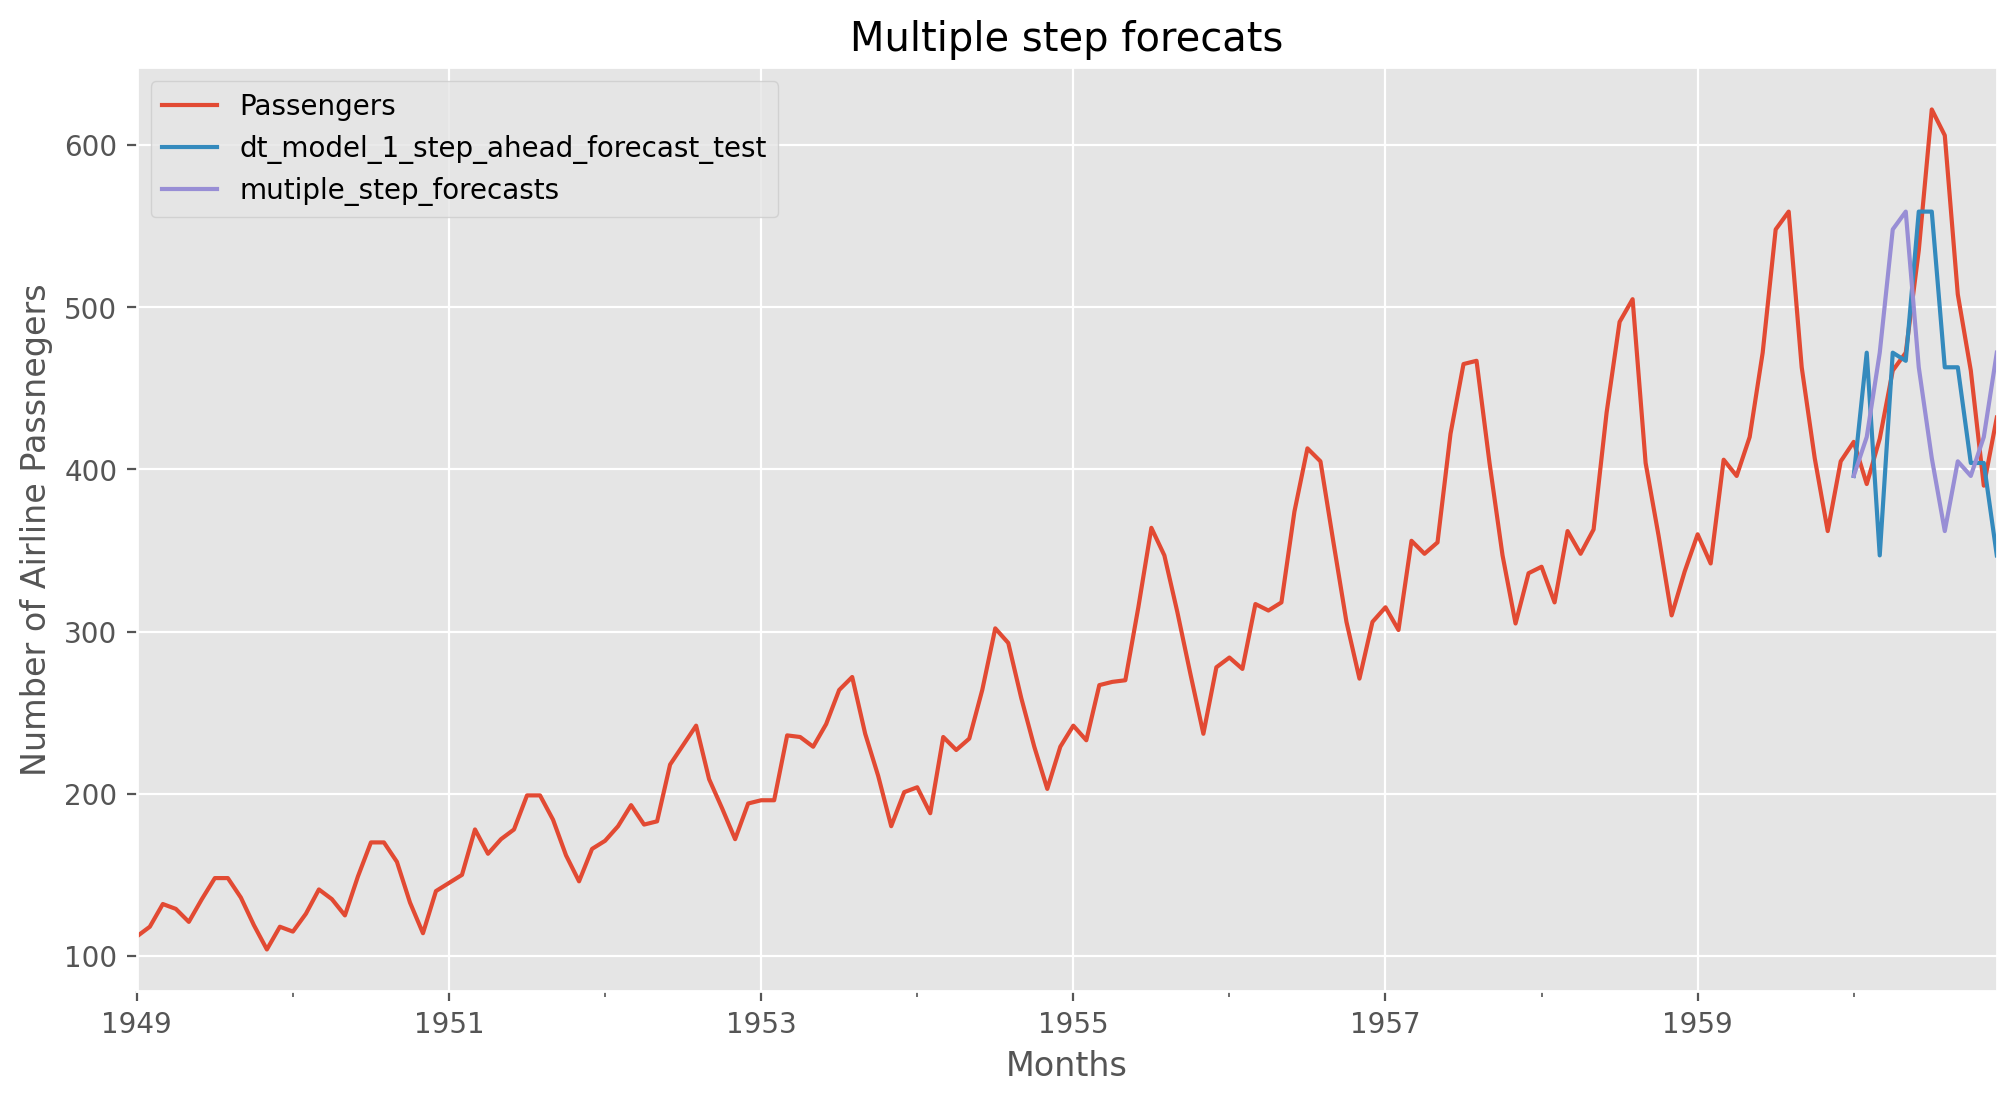

In [32]:
## plotting the data  
data[['Passengers','dt_model_1_step_ahead_forecast_test','mutiple_step_forecasts']].plot(figsize=(12,6))
plt.title('Multiple step forecats')
plt.ylabel('Number of Airline Passnegers')
plt.xlabel('Months')
plt.legend()
plt.show()

In [33]:
## Multi output 
Tx = 2 
## Ty   
Ty = test_period
## creating the X and  y  
X = np.array([series[t:t+Tx] for t in range(len(series)-Tx-Ty+1)])
y = np.array([series[t+Tx:t+Tx+Ty] for t in range(len(series)-Tx-Ty+1)])

In [34]:
## print the shape of the data  
print(f'The shape for X is {X.shape}')
print(f'The shape for y is {y.shape}')

The shape for X is (131, 2)
The shape for y is (131, 12)


In [35]:
## splitting the data  
X_trian , y_train = X[:-1] , y[:-1]
X_test , y_test = X[-1:], y[-1:]

In [36]:
## checking the shapes  
print(f'The shape for X traun is {X_trian.shape}')
print(f'The shape for X test is {y_train.shape}')
print(f'The shape for X test is {X_test.shape}')
print(f'The shape for y test is {y_test.shape}')

The shape for X traun is (130, 2)
The shape for X test is (130, 12)
The shape for X test is (1, 2)
The shape for y test is (1, 12)


In [37]:
## make preidctions  
dt_model_1_multi_output_train = DecisionTreeRegressor().fit(X_trian , y_train).predict(X_trian)
## test
dt_model_1_multi_output_test = DecisionTreeRegressor().fit(X_trian , y_train).predict(X_test)


In [38]:
dt_model_1_multi_output_train[0]

array([132., 129., 121., 135., 148., 148., 136., 119., 104., 118., 115.,
       126.])

In [39]:
dt_model_1_multi_output_test[0]

array([465., 467., 404., 347., 305., 336., 340., 318., 362., 348., 363.,
       435.])

In [40]:
## assign the values to the 
data.loc[test_indicator , 'dt_model_1_multi_output_test'] = dt_model_1_multi_output_test[0]

In [41]:
## checking the data 
data.head()

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test,mutiple_step_forecasts,dt_model_1_multi_output_test
Month,,,,,
1949-01,112,NaN,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN,NaN
1949-03,132,132.0,NaN,NaN,NaN
1949-04,129,129.0,NaN,NaN,NaN
1949-05,121,121.0,NaN,NaN,NaN


In [42]:
## checking the last 
data.tail()

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test,mutiple_step_forecasts,dt_model_1_multi_output_test
Month,,,,,
1960-08,606,NaN,463.0,362.0,318.0
1960-09,508,NaN,463.0,405.0,362.0
1960-10,461,NaN,404.0,396.0,348.0
1960-11,390,NaN,404.0,420.0,363.0
1960-12,432,NaN,347.0,472.0,435.0


In [43]:
## Evaluation   
passengers_test  = data.loc[test_indicator , 'Passengers']
passengers_test

Month
1960-01    417
1960-02    391
1960-03    419
1960-04    461
1960-05    472
1960-06    535
1960-07    622
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Freq: M, Name: Passengers, dtype: int64

In [44]:
##  
mape1 = mean_absolute_percentage_error(passengers_test , data.loc[test_indicator , 'dt_model_1_step_ahead_forecast_test'])
mape2 = mean_absolute_percentage_error(passengers_test , data.loc[test_indicator ,'mutiple_step_forecasts'])
mape3 = mean_absolute_percentage_error(passengers_test , data.loc[test_indicator ,'dt_model_1_multi_output_test'])

In [45]:
## print  
print(f'The Mean Absolute Percentage Error for 1 is = {mape1:.3f}')
print(f'The Mean Absolute Percentage Error for 2 is = {mape2:.3f}')
print(f'The Mean Absolute Percentage Error for 3 is = {mape3:.3f}')

The Mean Absolute Percentage Error for 1 is = 0.108
The Mean Absolute Percentage Error for 2 is = 0.168
The Mean Absolute Percentage Error for 3 is = 0.238


In [46]:
## defining the function  
def ml_forecaster(data , target , fh , lags , model , model_name): 
    ## defining the series  
    series = data[target].dropna().to_numpy()
    ## create test periods  
    test_period = fh 
    ## train period  
    train_period = len(data)- test_period 
    ## creating thee train and test  
    train = data[:train_period]
    test = data[test_period:]
    ## Number of lags  
    Tx = lags 
    ## Number of output 
    Ty = 1
    ## creating Boolean Indicators  
    train_indicator = (data.index <= train.index[-1])
    test_indicator = (data.index > train.index[-1])
    ## setting the two values to False 
    train_indicator[:Tx]= False
    ## creating Inputs
    X = np.array([series[t:t+Tx] for t  in range(len(series)-Tx-Ty + 1)])
    y = np.array([series[t+Tx:t+Tx+Ty] for t in range(len(series)-Tx-Ty+1)])
    ## creating teain and test spit 
    X_trian , y_train = X[:-test_period] , y[:-test_period]
    X_test , y_test = X[-test_period:] ,y[-test_period:]
    ## fit the model  
    model.fit(X_trian , y_train)
    ## make preidtions  
    data.loc[test_indicator,f'{model_name}_1_step_ahead_forecast']=model.predict(X_test)
    ## Mutiple step Ahead forecast  
    multiple_steps_forecast = []
    ## selecting the sample for mutiple predictions  
    input_x = X_test[0]
    ## while loop 
    while len(multiple_steps_forecast)<test_period:  
        prediction = model.predict(input_x.reshape(1,-1))[0]
        ## save the prediction to container  
        multiple_steps_forecast.append(prediction)
        ## update the data  
        input_x = np.roll(input_x,-1)
        ## replace the last value  
        input_x[-1] = prediction
    ## save the preddiction to the data frame  
    data.loc[test_indicator ,f'{model_name}_multiple_step_ahead_forecast']=multiple_steps_forecast
    ## MAPE  
    mape1 = mean_absolute_percentage_error(data.loc[test_indicator , target],data.loc[test_indicator , f'{model_name}_1_step_ahead_forecast'])
    mape2 = mean_absolute_percentage_error(data.loc[test_indicator , target], data.loc[test_indicator ,f'{model_name}_multiple_step_ahead_forecast'])
    ## print the mapes  
    print(f'The Mean Absolute Percentage Error for One step Ahead forecast is = {mape1:.3f}')
    print(f'The Mean Absolute Percentage Error for Mutiple step Ahead forecast is = {mape2:.3f} ')
    ## Visuualizse 
    data[[target,f'{model_name}_1_step_ahead_forecast',f'{model_name}_multiple_step_ahead_forecast']].plot(figsize=(12,6))
    plt.title('One step Ahead forecast vs Mutiple step Ahead forecast')
    plt.show()
    return data




d:\tong_1\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The Mean Absolute Percentage Error for One step Ahead forecast is = 0.085
The Mean Absolute Percentage Error for Mutiple step Ahead forecast is = 0.114 


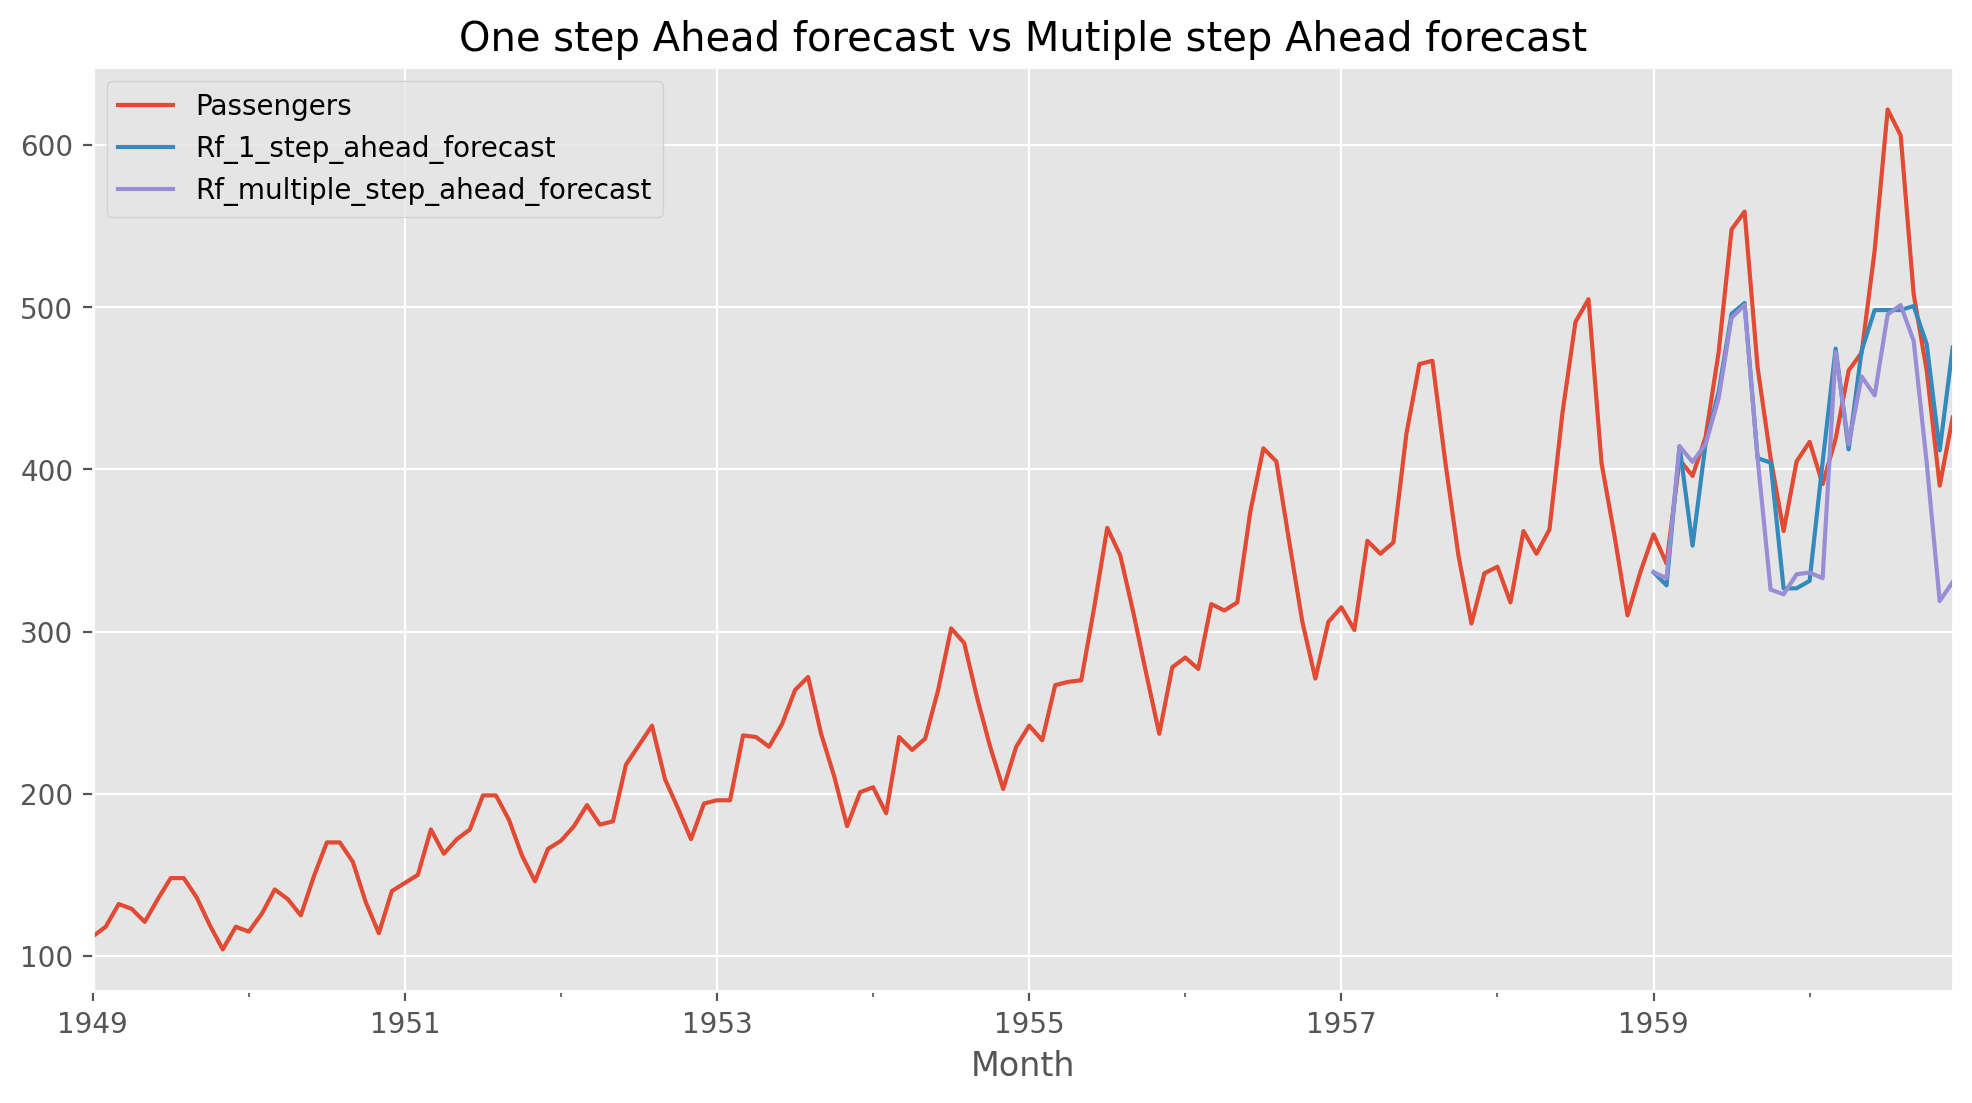

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test,mutiple_step_forecasts,dt_model_1_multi_output_test,Rf_1_step_ahead_forecast,Rf_multiple_step_ahead_forecast
Month,,,,,,,
1949-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN,NaN,NaN,NaN
1949-03,132,132.0,NaN,NaN,NaN,NaN,NaN
1949-04,129,129.0,NaN,NaN,NaN,NaN,NaN
1949-05,121,121.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1960-08,606,NaN,463.0,362.0,318.0,498.28,501.36
1960-09,508,NaN,463.0,405.0,362.0,500.80,479.24
1960-10,461,NaN,404.0,396.0,348.0,477.30,404.29


In [47]:
## calling the function  
ml_forecaster(data=data,target='Passengers',fh=24,lags=12,model=RandomForestRegressor(bootstrap=False),model_name='Rf')

The Mean Absolute Percentage Error for One step Ahead forecast is = 0.136
The Mean Absolute Percentage Error for Mutiple step Ahead forecast is = 0.139 


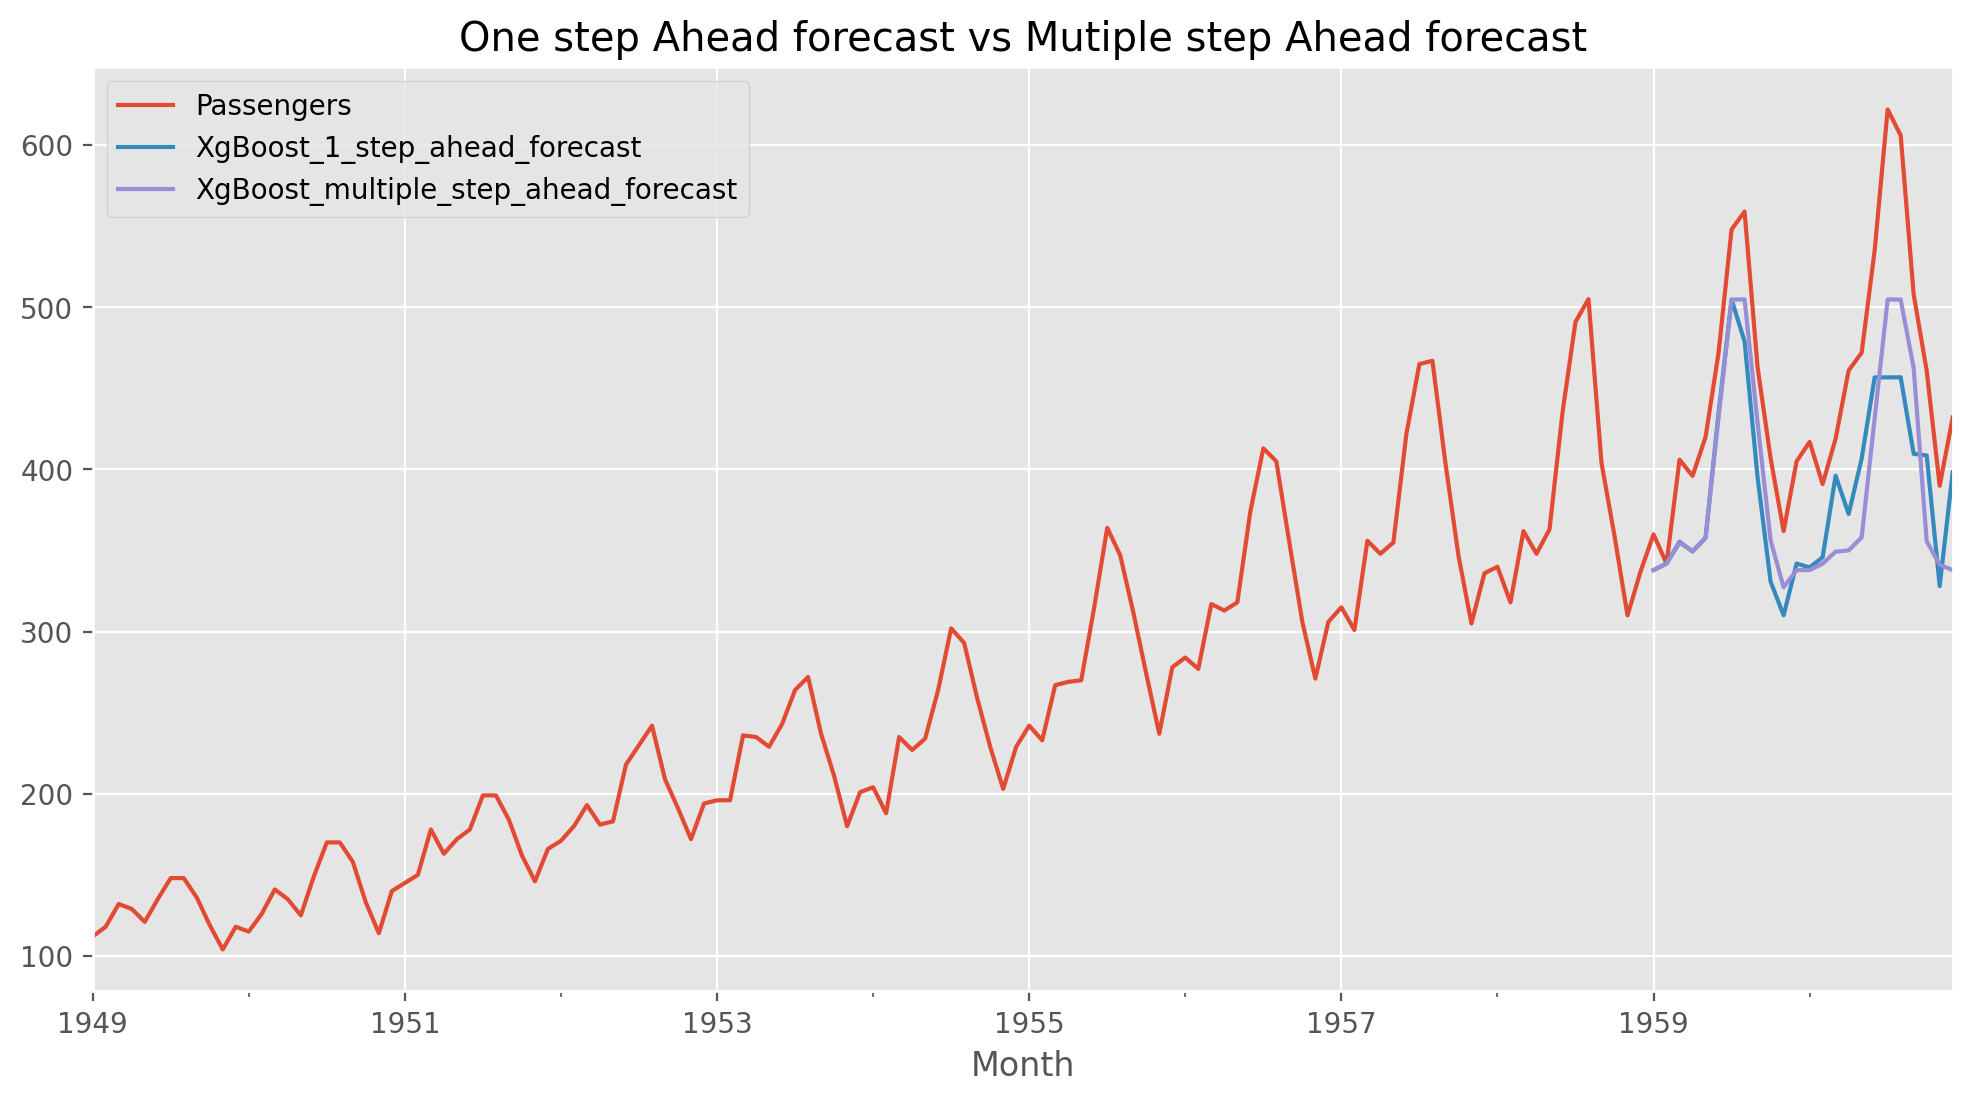

,Passengers,dt_model_1_step_ahead_forecast_train,dt_model_1_step_ahead_forecast_test,mutiple_step_forecasts,dt_model_1_multi_output_test,Rf_1_step_ahead_forecast,Rf_multiple_step_ahead_forecast,XgBoost_1_step_ahead_forecast,XgBoost_multiple_step_ahead_forecast
Month,,,,,,,,,
1949-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03,132,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04,129,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05,121,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1960-08,606,NaN,463.0,362.0,318.0,498.28,501.36,456.830872,504.781677
1960-09,508,NaN,463.0,405.0,362.0,500.80,479.24,409.609436,462.490417
1960-10,461,NaN,404.0,396.0,348.0,477.30,404.29,408.620026,355.776855


In [49]:
## importing xgboost  
from xgboost import XGBRegressor
ml_forecaster(data=data,target='Passengers',fh=24,lags=12,model=XGBRegressor(),model_name='XgBoost')